Import requried packages.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
import joblib

Import dataset into data frame.

In [ ]:
df=pd.read_csv('/content/laptop.csv')

viewing dataframe.

In [ ]:
df.head()

Unnamed: 0.1  Unnamed: 0 Company   TypeName Inches  \
0             0         0.0   Apple  Ultrabook   13.3   
1             1         1.0   Apple  Ultrabook   13.3   
2             2         2.0      HP   Notebook   15.6   
3             3         3.0   Apple  Ultrabook   15.4   
4             4         4.0   Apple  Ultrabook   13.3   

                     ScreenResolution                         Cpu   Ram  \
0  IPS Panel Retina Display 2560x1600        Intel Core i5 2.3GHz   8GB   
1                            1440x900        Intel Core i5 1.8GHz   8GB   
2                   Full HD 1920x1080  Intel Core i5 7200U 2.5GHz   8GB   
3  IPS Panel Retina Display 2880x1800        Intel Core i7 2.7GHz  16GB   
4  IPS Panel Retina Display 2560x1600        Intel Core i5 3.1GHz   8GB   

                Memory                           Gpu  OpSys  Weight  \
0            128GB SSD  Intel Iris Plus Graphics 640  macOS  1.37kg   
1  128GB Flash Storage        Intel HD Graphics 6000  macOS  1.34kg   
2            256GB SSD         Intel HD Graphics 620  No OS  1.86kg   
3            512GB SSD            AMD Radeon Pro 455  macOS  1.83kg   
4            256GB SSD  Intel Iris Plus Graphics 650  macOS  1.37kg   

         Price  
0   71378.6832  
1   47895.5232  
2   30636.0000  
3  135195.3360  
4   96095.8080

Drop un-necessary columns.

In [ ]:
df.drop(['Unnamed: 0.1'],axis=1,inplace=True)
df = df.drop(df.columns[0], axis=1)
df.head()

Company   TypeName Inches                    ScreenResolution  \
0   Apple  Ultrabook   13.3  IPS Panel Retina Display 2560x1600   
1   Apple  Ultrabook   13.3                            1440x900   
2      HP   Notebook   15.6                   Full HD 1920x1080   
3   Apple  Ultrabook   15.4  IPS Panel Retina Display 2880x1800   
4   Apple  Ultrabook   13.3  IPS Panel Retina Display 2560x1600   

                          Cpu   Ram               Memory  \
0        Intel Core i5 2.3GHz   8GB            128GB SSD   
1        Intel Core i5 1.8GHz   8GB  128GB Flash Storage   
2  Intel Core i5 7200U 2.5GHz   8GB            256GB SSD   
3        Intel Core i7 2.7GHz  16GB            512GB SSD   
4        Intel Core i5 3.1GHz   8GB            256GB SSD   

                            Gpu  OpSys  Weight        Price  
0  Intel Iris Plus Graphics 640  macOS  1.37kg   71378.6832  
1        Intel HD Graphics 6000  macOS  1.34kg   47895.5232  
2         Intel HD Graphics 620  No OS  1.86kg   30636.0000  
3            AMD Radeon Pro 455  macOS  1.83kg  135195.3360  
4  Intel Iris Plus Graphics 650  macOS  1.37kg   96095.8080

Checking data types.

In [ ]:
df.dtypes

Company              object
TypeName             object
Inches               object
ScreenResolution     object
Cpu                  object
Ram                  object
Memory               object
Gpu                  object
OpSys                object
Weight               object
Price               float64
dtype: object

Checking NULL-Values count.

In [ ]:
df.isnull().sum()

Company             30
TypeName            30
Inches              30
ScreenResolution    30
Cpu                 30
Ram                 30
Memory              30
Gpu                 30
OpSys               30
Weight              30
Price               30
dtype: int64

Finding Null rows.

In [ ]:
null_rows=df[df.isnull().all(axis=1)]
null_rows

Company TypeName Inches ScreenResolution  Cpu  Ram Memory  Gpu OpSys  \
20       NaN      NaN    NaN              NaN  NaN  NaN    NaN  NaN   NaN   
46       NaN      NaN    NaN              NaN  NaN  NaN    NaN  NaN   NaN   
50       NaN      NaN    NaN              NaN  NaN  NaN    NaN  NaN   NaN   
115      NaN      NaN    NaN              NaN  NaN  NaN    NaN  NaN   NaN   
125      NaN      NaN    NaN              NaN  NaN  NaN    NaN  NaN   NaN   
148      NaN      NaN    NaN              NaN  NaN  NaN    NaN  NaN   NaN   
190      NaN      NaN    NaN              NaN  NaN  NaN    NaN  NaN   NaN   
209      NaN      NaN    NaN              NaN  NaN  NaN    NaN  NaN   NaN   
267      NaN      NaN    NaN              NaN  NaN  NaN    NaN  NaN   NaN   
336      NaN      NaN    NaN              NaN  NaN  NaN    NaN  NaN   NaN   
350      NaN      NaN    NaN              NaN  NaN  NaN    NaN  NaN   NaN   
478      NaN      NaN    NaN              NaN  NaN  NaN    NaN  NaN   NaN   
567      NaN      NaN    NaN              NaN  NaN  NaN    NaN  NaN   NaN   
616      NaN      NaN    NaN              NaN  NaN  NaN    NaN  NaN   NaN   
625      NaN      NaN    NaN              NaN  NaN  NaN    NaN  NaN   NaN   
629      NaN      NaN    NaN              NaN  NaN  NaN    NaN  NaN   NaN   
666      NaN      NaN    NaN              NaN  NaN  NaN    NaN  NaN   NaN   
699      NaN      NaN    NaN              NaN  NaN  NaN    NaN  NaN   NaN   
726      NaN      NaN    NaN              NaN  NaN  NaN    NaN  NaN   NaN   
747      NaN      NaN    NaN              NaN  NaN  NaN    NaN  NaN   NaN   
753      NaN      NaN    NaN              NaN  NaN  NaN    NaN  NaN   NaN   
774      NaN      NaN    NaN              NaN  NaN  NaN    NaN  NaN   NaN   
922      NaN      NaN    NaN              NaN  NaN  NaN    NaN  NaN   NaN   
923      NaN      NaN    NaN              NaN  NaN  NaN    NaN  NaN   NaN   
938      NaN      NaN    NaN              NaN  NaN  NaN    NaN  NaN   NaN   
978      NaN      NaN    NaN              NaN  NaN  NaN    NaN  NaN   NaN   
994      NaN      NaN    NaN              NaN  NaN  NaN    NaN  NaN   NaN   
1060     NaN      NaN    NaN              NaN  NaN  NaN    NaN  NaN   NaN   
1202     NaN      NaN    NaN              NaN  NaN  NaN    NaN  NaN   NaN   
1245     NaN      NaN    NaN              NaN  NaN  NaN    NaN  NaN   NaN   

     Weight  Price  
20      NaN    NaN  
46      NaN    NaN  
50      NaN    NaN  
115     NaN    NaN  
125     NaN    NaN  
148     NaN    NaN  
190     NaN    NaN  
209     NaN    NaN  
267     NaN    NaN  
336     NaN    NaN  
350     NaN    NaN  
478     NaN    NaN  
567     NaN    NaN  
616     NaN    NaN  
625     NaN    NaN  
629     NaN    NaN  
666     NaN    NaN  
699     NaN    NaN  
726     NaN    NaN  
747     NaN    NaN  
753     NaN    NaN  
774     NaN    NaN  
922     NaN    NaN  
923     NaN    NaN  
938     NaN    NaN  
978     NaN    NaN  
994     NaN    NaN  
1060    NaN    NaN  
1202    NaN    NaN  
1245    NaN    NaN

Droping and checking for Null rows in the dataset.

In [ ]:
df.dropna(how='all', inplace=True)
blank_rows=df[df.isnull().all(axis=1)]
blank_rows

Empty DataFrame
Columns: [Company, TypeName, Inches, ScreenResolution, Cpu, Ram, Memory, Gpu, OpSys, Weight, Price]
Index: []

Checking for Duplicate rows.

In [ ]:
print(df.duplicated().sum())

29


Droping duplicate rows.

In [ ]:
df=df.drop_duplicates()


Finding No.of duplicate rows.

In [ ]:
print(df.duplicated().sum())

0


Checking for Null values.

In [ ]:

df.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

Converting weight,Ram,Inches columns into numeric.

In [ ]:
df = df[df['Weight'] != '?']
df['Weight'] = df['Weight'].str.replace('kg', '').astype(float)
df['Ram'] = df['Ram'].str.replace('GB', '').astype(int)
df = df[df['Inches'] != '?']
df['Inches'] = df['Inches'].astype(float)
df.dtypes


<ipython-input-13-e143a561dd8c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Weight'] = df['Weight'].str.replace('kg', '').astype(float)
<ipython-input-13-e143a561dd8c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Ram'] = df['Ram'].str.replace('GB', '').astype(int)


Company              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                   int64
Memory               object
Gpu                  object
OpSys                object
Weight              float64
Price               float64
dtype: object

CPU

In [ ]:
df['Cpu_brand'] = df['Cpu'].apply(lambda x: x.split()[0] + ' ' + x.split()[1])

GPU

In [ ]:
df['Gpu_brand'] = df['Gpu'].apply(lambda x: x.split()[0])


Memory

In [ ]:
def mem_size(memory_split):
    # Replace "TB" with "000GB" to convert to GB properly
    memory_split = memory_split.replace("TB", "000GB")
    memory_split = memory_split.replace("GB", "")  # Now remove all GB
    mem_type = {'HDD': 0, 'SSD': 0, 'Hybrid': 0, 'Flash Storage': 0}
    parts = memory_split.split('+')
    for i in parts:
        i = i.strip()
        for key in mem_type:
            if key in i:
                try:
                    mem_type[key] = int(i.split()[0])
                except:
                    mem_type[key] = 0
    return pd.Series(mem_type)
Splited_Memory=df['Memory'].apply(mem_size)
df=pd.concat([df,Splited_Memory],axis=1)


Screen Resolution

In [ ]:
df['TouchScreen']=df['ScreenResolution'].apply(lambda x: 1 if 'Touchscreen' in x else 0)
df['IPS']=df['ScreenResolution'].apply(lambda x: 1 if 'IPS' in x else 0)
df['X_res'] = df['ScreenResolution'].str.extract(r'(\d+)x')[0].astype(int)
df['Y_res'] = df['ScreenResolution'].str.extract(r'x(\d+)')[0].astype(int)
df['PPI'] = np.sqrt(df['X_res']**2 + df['Y_res']**2) / df['Inches']


Dropping Un-necessary columns.

In [ ]:
df=df.drop(['Cpu','Gpu','Memory','ScreenResolution','Inches'],axis=1)

Dataset information.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1242 entries, 0 to 1273
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        1242 non-null   object 
 1   TypeName       1242 non-null   object 
 2   Ram            1242 non-null   int64  
 3   OpSys          1242 non-null   object 
 4   Weight         1242 non-null   float64
 5   Price          1242 non-null   float64
 6   Cpu_brand      1242 non-null   object 
 7   Gpu_brand      1242 non-null   object 
 8   HDD            1242 non-null   int64  
 9   SSD            1242 non-null   int64  
 10  Hybrid         1242 non-null   int64  
 11  Flash Storage  1242 non-null   int64  
 12  TouchScreen    1242 non-null   int64  
 13  IPS            1242 non-null   int64  
 14  X_res          1242 non-null   int64  
 15  Y_res          1242 non-null   int64  
 16  PPI            1242 non-null   float64
dtypes: float64(3), int64(9), object(5)
memory usage: 174.7+ K

Target variable distribution.

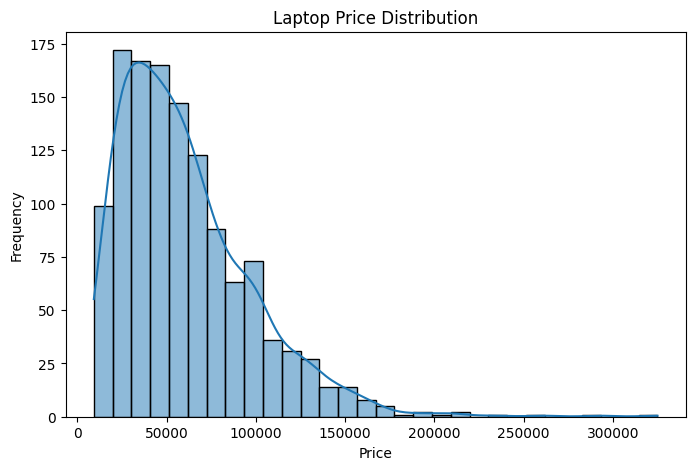

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Price'], kde=True, bins=30)
plt.title("Laptop Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

CountPlot for Company.

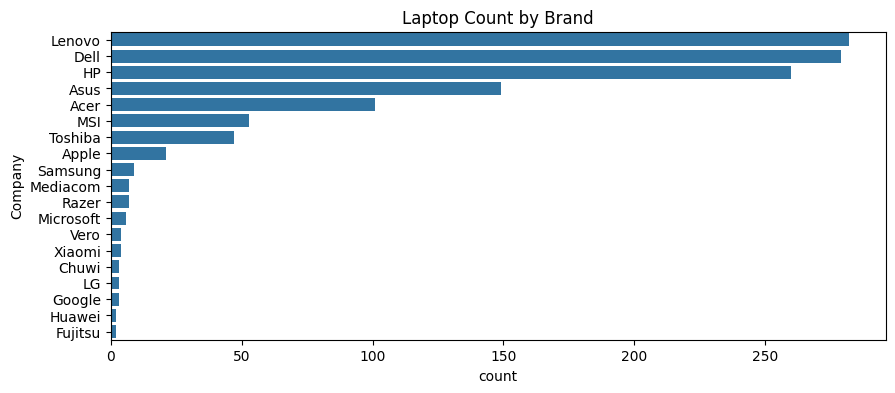

In [ ]:
plt.figure(figsize=(10, 4))
sns.countplot(y=df['Company'], order=df['Company'].value_counts().index)
plt.title("Laptop Count by Brand")
plt.show()


CountPlot for TypeName.

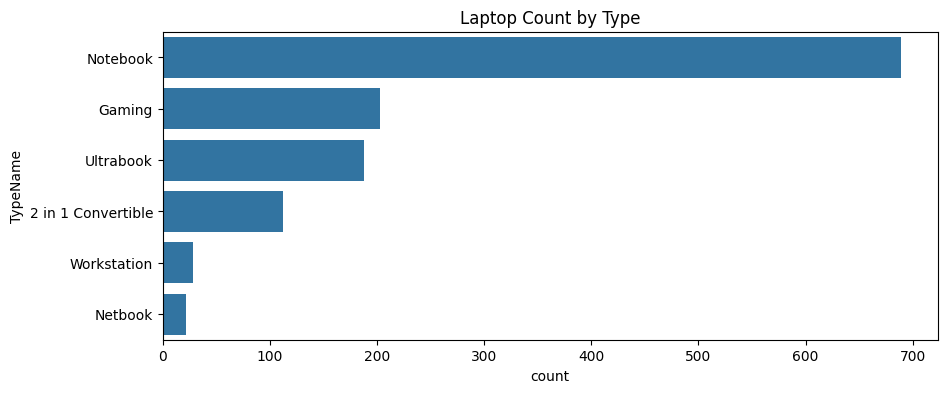

In [ ]:
plt.figure(figsize=(10, 4))
sns.countplot(y=df['TypeName'], order=df['TypeName'].value_counts().index)
plt.title("Laptop Count by Type")
plt.show()

Correlation of features.

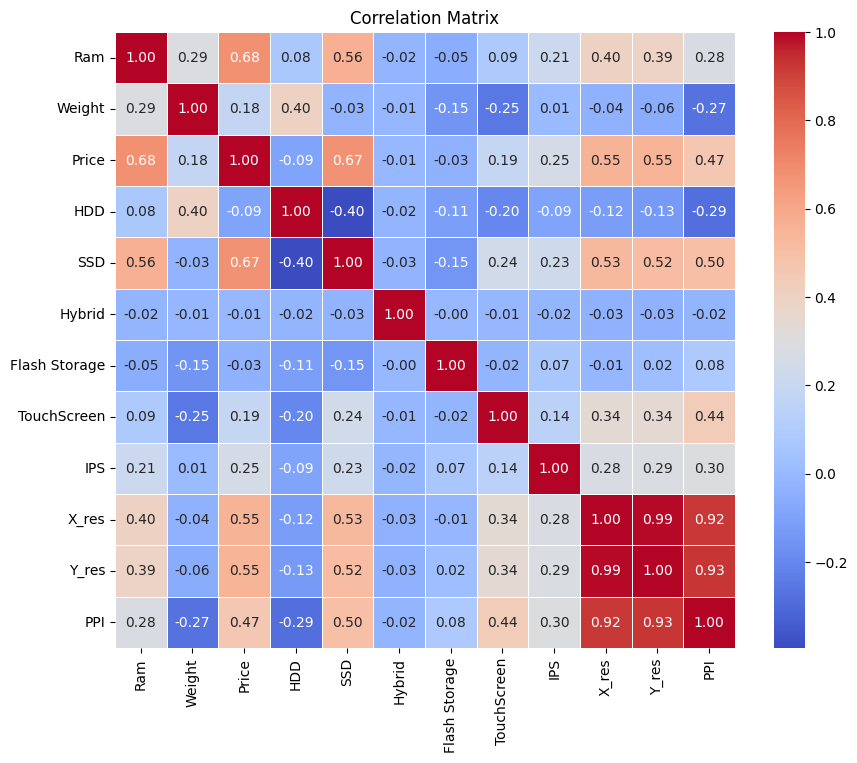

In [ ]:
plt.figure(figsize=(10, 8))
#sns.heatmap((df.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm', fmt='.2f')
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

Price vs GPU Brand.

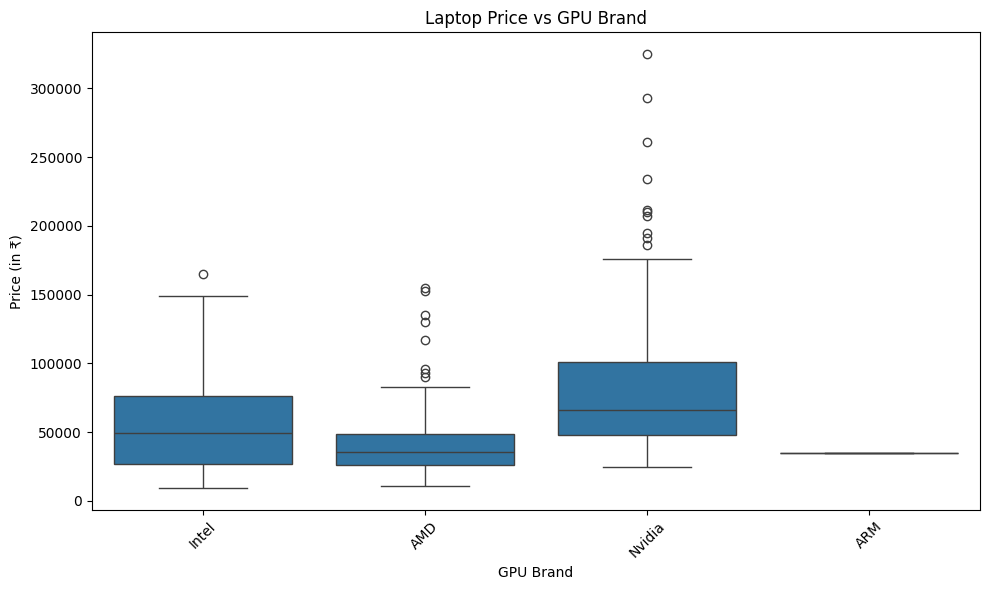

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Gpu_brand', y='Price', data=df)
plt.title('Laptop Price vs GPU Brand')
plt.xlabel('GPU Brand')
plt.ylabel('Price (in ₹)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

RAM VS PRICE

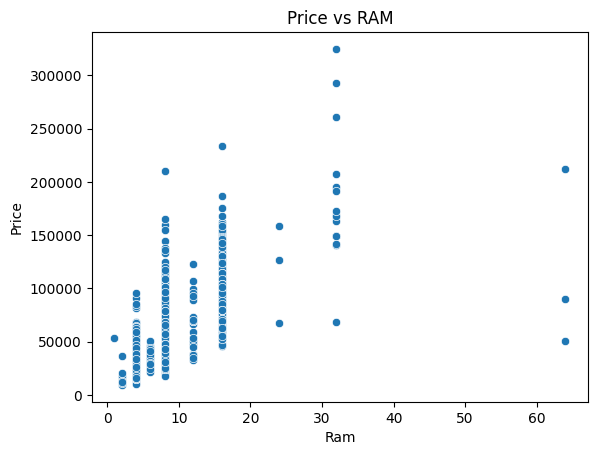

In [ ]:
sns.scatterplot(x='Ram', y='Price', data=df)
plt.title("Price vs RAM")
plt.show()

Price vs Company.

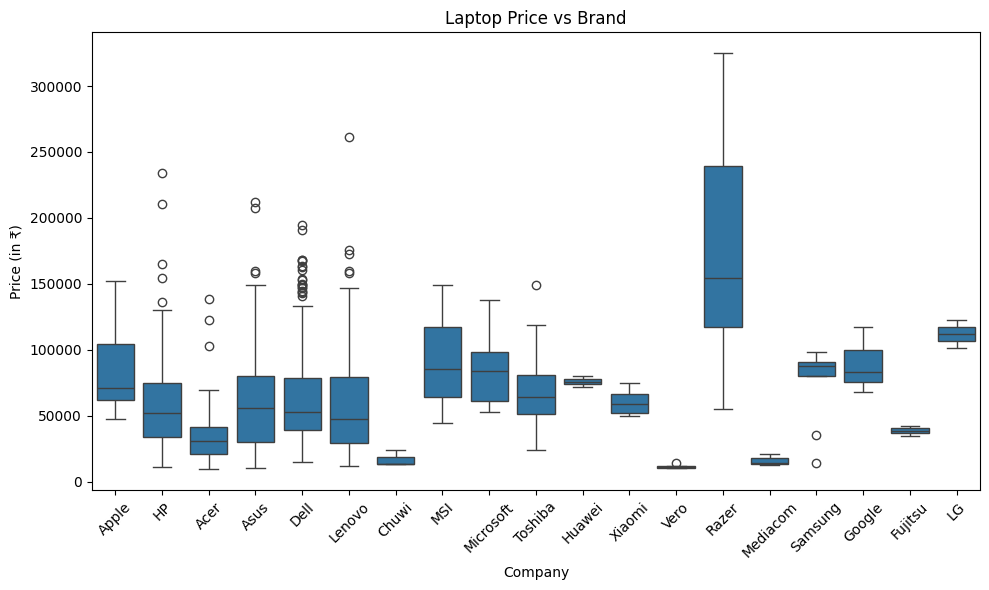

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Company', y='Price', data=df)
plt.title('Laptop Price vs Brand')
plt.xlabel('Company')
plt.ylabel('Price (in ₹)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

PRICE VS WEIGHT

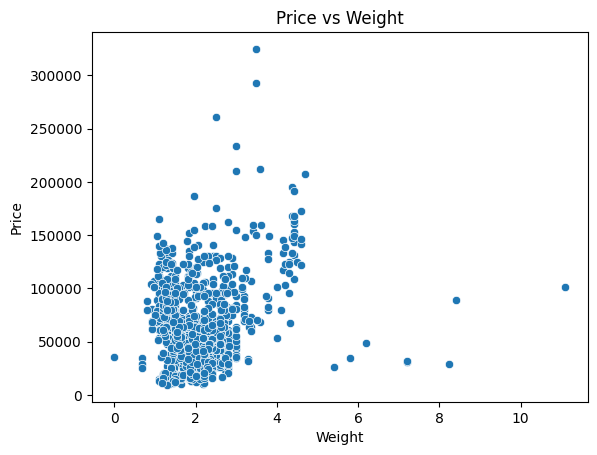

In [ ]:
sns.scatterplot(x='Weight', y='Price', data=df)
plt.title("Price vs Weight")
plt.show()

PRICE VS PPI

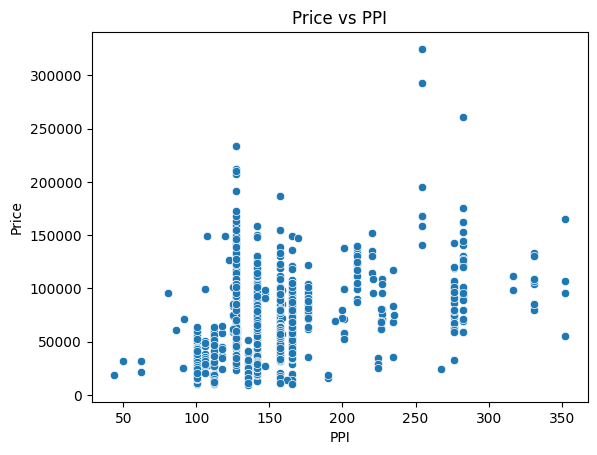

In [ ]:
sns.scatterplot(x='PPI', y='Price', data=df)
plt.title("Price vs PPI")
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1242 entries, 0 to 1273
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        1242 non-null   object 
 1   TypeName       1242 non-null   object 
 2   Ram            1242 non-null   int64  
 3   OpSys          1242 non-null   object 
 4   Weight         1242 non-null   float64
 5   Price          1242 non-null   float64
 6   Cpu_brand      1242 non-null   object 
 7   Gpu_brand      1242 non-null   object 
 8   HDD            1242 non-null   int64  
 9   SSD            1242 non-null   int64  
 10  Hybrid         1242 non-null   int64  
 11  Flash Storage  1242 non-null   int64  
 12  TouchScreen    1242 non-null   int64  
 13  IPS            1242 non-null   int64  
 14  X_res          1242 non-null   int64  
 15  Y_res          1242 non-null   int64  
 16  PPI            1242 non-null   float64
dtypes: float64(3), int64(9), object(5)
memory usage: 174.7+ K

In [ ]:
df.isnull().sum()

Company          0
TypeName         0
Ram              0
OpSys            0
Weight           0
Price            0
Cpu_brand        0
Gpu_brand        0
HDD              0
SSD              0
Hybrid           0
Flash Storage    0
TouchScreen      0
IPS              0
X_res            0
Y_res            0
PPI              0
dtype: int64

Statistics of Numerical columns.

In [ ]:
df.describe()

Ram       Weight          Price          HDD          SSD  \
count  1242.000000  1242.000000    1242.000000  1242.000000  1242.000000   
mean      8.528986     2.080475   60538.359281   413.574879   184.386473   
std       5.591338     0.814352   37402.428994   517.486748   183.710960   
min       1.000000     0.000200    9270.720000     0.000000     0.000000   
25%       4.000000     1.500000   32645.055600     0.000000     0.000000   
50%       8.000000     2.040000   52693.920000     0.000000   256.000000   
75%       8.000000     2.330000   79773.480000  1000.000000   256.000000   
max      64.000000    11.100000  324954.720000  2000.000000  1000.000000   

            Hybrid  Flash Storage  TouchScreen          IPS        X_res  \
count  1242.000000    1242.000000  1242.000000  1242.000000  1242.000000   
mean      0.409018       4.547504     0.145733     0.282609  1899.990338   
std      14.414611      30.826745     0.352980     0.450449   493.225827   
min       0.000000       0.000000     0.000000     0.000000  1366.000000   
25%       0.000000       0.000000     0.000000     0.000000  1920.000000   
50%       0.000000       0.000000     0.000000     0.000000  1920.000000   
75%       0.000000       0.000000     0.000000     1.000000  1920.000000   
max     508.000000     512.000000     1.000000     1.000000  3840.000000   

             Y_res          PPI  
count  1242.000000  1242.000000  
mean   1073.916264   146.376611  
std     283.959615    43.336053  
min     768.000000    44.019462  
25%    1080.000000   127.335675  
50%    1080.000000   141.211998  
75%    1080.000000   157.350512  
max    2160.000000   352.465147

Feature Distribution.

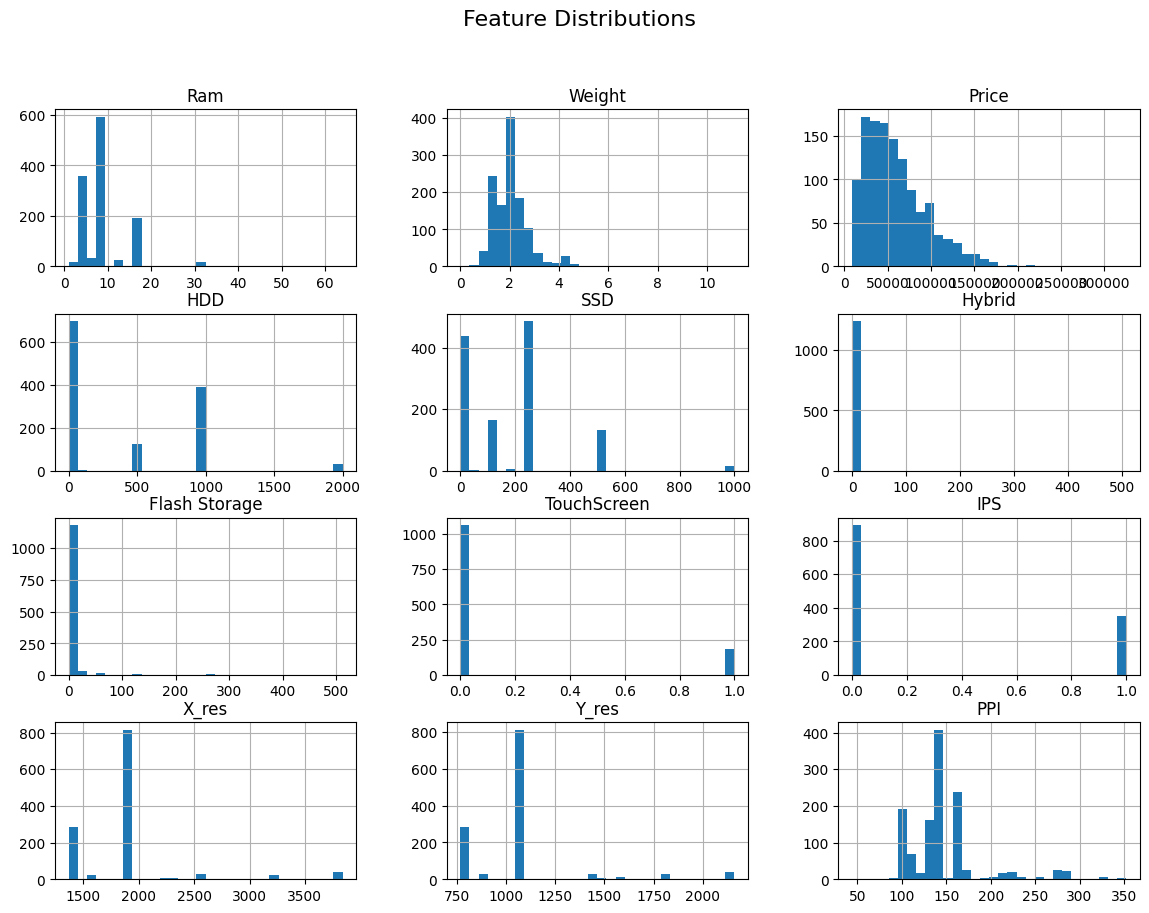

In [ ]:
# Histogram for numerical columns
df.hist(figsize=(14, 10), bins=30)
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

Encoding.

In [ ]:
df1=df.copy()

In [ ]:
cat_cols=df.select_dtypes(include='object').columns
label=LabelEncoder()
for col in cat_cols:
  df[col]=label.fit_transform(df[col])


In [ ]:
print(df.shape)
df.dtypes

(1242, 17)


Company            int64
TypeName           int64
Ram                int64
OpSys              int64
Weight           float64
Price            float64
Cpu_brand          int64
Gpu_brand          int64
HDD                int64
SSD                int64
Hybrid             int64
Flash Storage      int64
TouchScreen        int64
IPS                int64
X_res              int64
Y_res              int64
PPI              float64
dtype: object

In [ ]:
df_with_outliers = df.copy()

Define features (X) and target variable (y).

In [ ]:
X=df.drop('Price',axis=1)
y=df['Price']

Train-Test Split(80-20).

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

Model Fitting,Training,Evalution (With Outliers).

In [ ]:

models={'Linear Regression':LinearRegression(),'Random Forest':RandomForestRegressor(),'Gradient Boosting':GradientBoostingRegressor()}
results=[]

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append({"Model": name, "R2 Score (With Outliers)": r2, "RMSE (With Outliers)": mse**0.5})

results_df = pd.DataFrame(results)


## Removing outliers with IQR, Model fitting, Training, Evaluting (Without Outliers).

In [ ]:
# Remove Outliers (based on IQR in Price)
Q1 = df_with_outliers['Price'].quantile(0.25)
Q3 = df_with_outliers['Price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_no = df_with_outliers[(df_with_outliers['Price'] >= lower_bound) & (df_with_outliers['Price'] <= upper_bound)]


In [ ]:
# Feature & Target Split (Without Outliers)
X_no = df_no.drop(columns=['Price'])
y_no = df_no['Price']
X_train_no, X_test_no, y_train_no, y_test_no = train_test_split(X_no, y_no, test_size=0.2, random_state=42)

#  Model Training & Evaluation (Without Outliers)
models = {
    "Random Forest": RandomForestRegressor(random_state=42),
    "Linear Regression": LinearRegression(),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

results_no = []

for name, model in models.items():
    model.fit(X_train_no, y_train_no)
    y_pred_no = model.predict(X_test_no)
    mse_no = mean_squared_error(y_test_no, y_pred_no)
    r2_no = r2_score(y_test_no, y_pred_no)
    results_no.append({"Model": name, "R2 Score (No Outliers)": r2_no, "RMSE (No Outliers)": mse_no**0.5})

results_df_no = pd.DataFrame(results_no)


Model Performance Comparison (With vs Without Outliers).

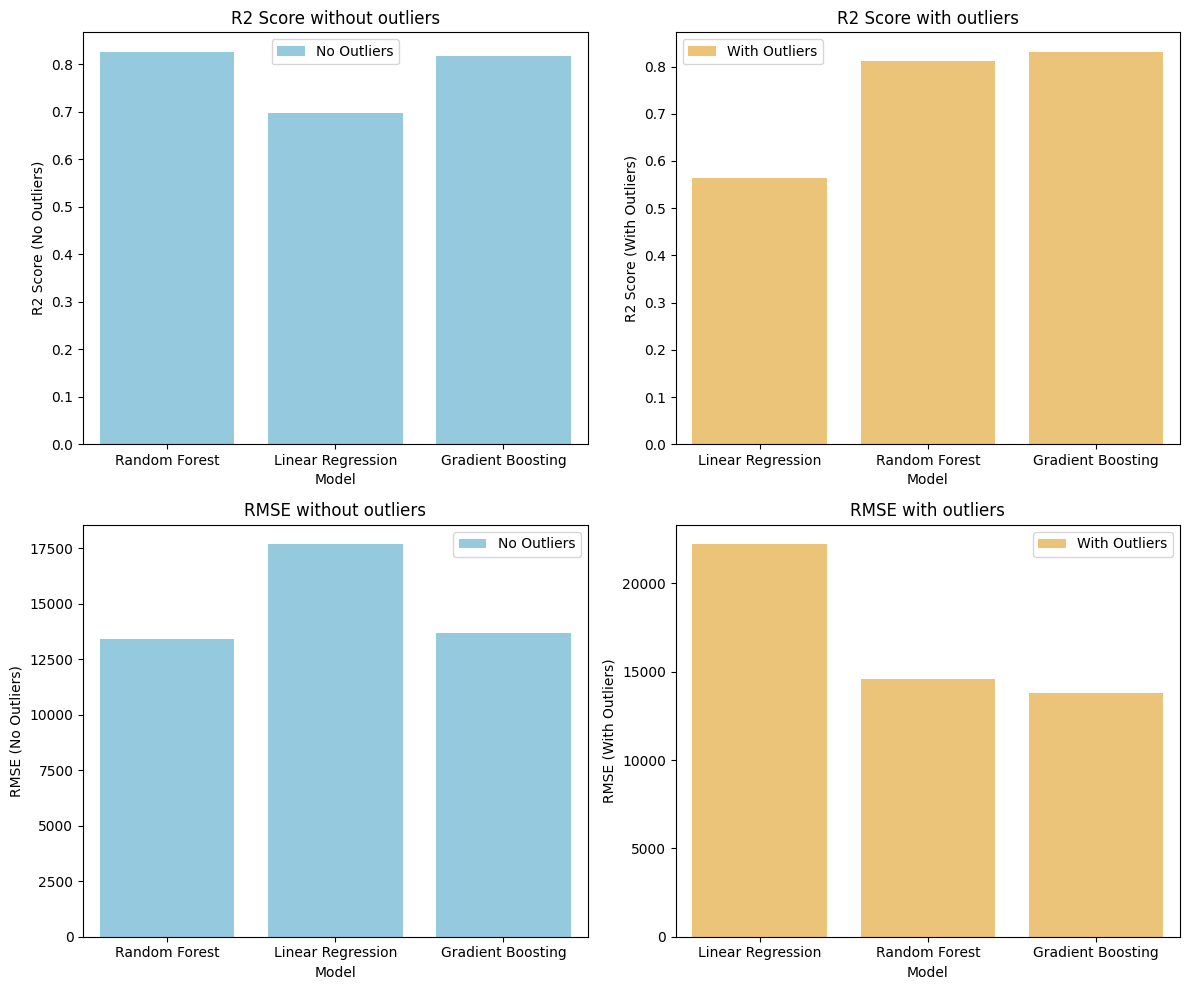

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10))
sns.barplot(data=results_df_no, x="Model", y="R2 Score (No Outliers)", ax=ax[0][0], color='skyblue', label='No Outliers')
sns.barplot(data=results_df, x="Model", y="R2 Score (With Outliers)", ax=ax[0][1], color='orange', alpha=0.6, label='With Outliers')
ax[0][0].set_title("R2 Score without outliers")
ax[0][0].legend()
ax[0][1].set_title("R2 Score with outliers")
ax[0][1].legend()

sns.barplot(data=results_df_no, x="Model", y="RMSE (No Outliers)", ax=ax[1][0], color='skyblue', label='No Outliers')
sns.barplot(data=results_df, x="Model", y="RMSE (With Outliers)", ax=ax[1][1], color='orange', alpha=0.6, label='With Outliers')
ax[1][0].set_title("RMSE without outliers")
ax[1][0].legend()
ax[1][1].set_title("RMSE with outliers")
ax[1][1].legend()
plt.tight_layout()
plt.show()



In [ ]:
# Summary Table
print("\nModel Performance Comparison (With vs Without Outliers):")
print(results_df.to_string(index=False))
print(results_df_no.to_string(index=False))


Model Performance Comparison (With vs Without Outliers):
            Model  R2 Score (With Outliers)  RMSE (With Outliers)
Linear Regression                  0.563564          22203.489804
    Random Forest                  0.811748          14582.464289
Gradient Boosting                  0.830898          13820.871891
            Model  R2 Score (No Outliers)  RMSE (No Outliers)
    Random Forest                0.825568        13401.092017
Linear Regression                0.696487        17677.293442
Gradient Boosting                0.817454        13709.234965


Considering Random Forest as best model with complete dataset(Including Outliers).

## Hyper Parameter Tuning with Random Forest Model of Regression.

In [ ]:

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
rf = RandomForestRegressor(random_state=42)
#GridSearchCV with outliers.
results_tuned=[]

gs = GridSearchCV(rf, param_grid, cv=5, scoring='r2', n_jobs=-1)
gs.fit(X_train, y_train)

best_rf = gs.best_estimator_
y_pred_tuned = best_rf.predict(X_test)

r2_tuned = r2_score(y_test, y_pred_tuned)
rmse_tuned = mean_squared_error(y_test, y_pred_tuned)**0.5

results_tuned.append({"Model": name, "R2_tuned Score (With Outliers)": r2_tuned, "RMSE_tuned (With Outliers)": rmse_tuned})
results_df_tuned = pd.DataFrame(results_tuned)

#GridSearchCV without outliers.
results_no_tuned=[]
gs_no=GridSearchCV(rf,param_grid,cv=5,scoring='r2',n_jobs=-1)
gs_no.fit(X_train_no,y_train_no)

best_rf_no=gs_no.best_estimator_
y_pred_tuned_no=best_rf_no.predict(X_test_no)


r2_tuned_no=r2_score(y_test_no,y_pred_tuned_no)
rmse_tuned_no=mean_squared_error(y_test_no,y_pred_tuned_no)**0.5


results_no_tuned.append({"Model": name, "R2_tuned Score (No Outliers)": r2_tuned_no, "RMSE_tuned (No Outliers)": rmse_tuned_no})
results_df_tuned_no = pd.DataFrame(results_no_tuned)


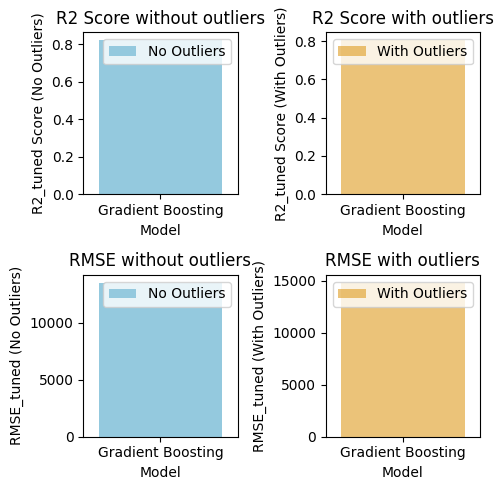

In [ ]:
# Visualize Comparison
fig, ax = plt.subplots(2, 2, figsize=(5, 5))
sns.barplot(data=results_df_tuned_no, x="Model", y="R2_tuned Score (No Outliers)", ax=ax[0][0], color='skyblue', label='No Outliers')
sns.barplot(data=results_df_tuned, x="Model", y="R2_tuned Score (With Outliers)", ax=ax[0][1], color='orange', alpha=0.6, label='With Outliers')
ax[0][0].set_title("R2 Score without outliers")
ax[0][0].legend()
ax[0][1].set_title("R2 Score with outliers")
ax[0][1].legend()

sns.barplot(data=results_df_tuned_no, x="Model", y="RMSE_tuned (No Outliers)", ax=ax[1][0], color='skyblue', label='No Outliers')
sns.barplot(data=results_df_tuned, x="Model", y="RMSE_tuned (With Outliers)", ax=ax[1][1], color='orange', alpha=0.6, label='With Outliers')
ax[1][0].set_title("RMSE without outliers")
ax[1][0].legend()
ax[1][1].set_title("RMSE with outliers")
ax[1][1].legend()
plt.tight_layout()
plt.show()



In [ ]:
# Summary Table
print("\nHyper parameter Model Performance Comparison (With vs Without Outliers):")
print(results_df_tuned.to_string(index=False))
print(results_df_tuned_no.to_string(index=False))


Hyper parameter Model Performance Comparison (With vs Without Outliers):
            Model  R2_tuned Score (With Outliers)  RMSE_tuned (With Outliers)
Gradient Boosting                        0.805329                14828.977678
            Model  R2_tuned Score (No Outliers)  RMSE_tuned (No Outliers)
Gradient Boosting                      0.822711              13510.376072


# Price-prediction

In [ ]:
encoders = {}
categorical_cols = ['Company', 'TypeName', 'OpSys', 'Cpu_brand', 'Gpu_brand']
for col in cat_cols:
    le = LabelEncoder()
    le.fit(df1[col])  #  Fit before transforming
    df1[col] = le.transform(df1[col])
    encoders[col] = le

joblib.dump(encoders, 'label_encoder.pkl')
joblib.dump(df1.drop(columns=['Price'], errors='ignore').columns.tolist(), 'feature_order.pkl')
joblib.dump(best_rf, 'laptop_price_predictor.pkl')


['laptop_price_predictor.pkl']

In [ ]:
print("Features used to train the model:")
print(df1.columns.tolist())


Features used to train the model:
['Company', 'TypeName', 'Ram', 'OpSys', 'Weight', 'Price', 'Cpu_brand', 'Gpu_brand', 'HDD', 'SSD', 'Hybrid', 'Flash Storage', 'TouchScreen', 'IPS', 'X_res', 'Y_res', 'PPI']


In [ ]:
best_model = joblib.load('laptop_price_predictor.pkl')
encoders = joblib.load('label_encoder.pkl')
feature_order = joblib.load('feature_order.pkl')


In [ ]:
def price_pred():
    print("Enter Laptop Specifications to Predict Price\n")
    for col in ['Company', 'TypeName', 'OpSys', 'Cpu_brand', 'Gpu_brand']:
        print(f"Available {col} options: {list(encoders[col].classes_)}")

    Company = input("Enter Company: ")
    typename = input("Enter TypeName: ")
    os = input("Enter Operating System: ")
    cpu = input("Enter CPU Brand: ")
    gpu = input("Enter GPU Brand: ")

    ram = int(input("Enter RAM (in GB): "))
    weight = float(input("Enter Weight (in KG): "))
    hdd = int(input("Enter HDD (in GB): "))
    ssd = int(input("Enter SSD (in GB): "))
    hybrid = int(input("Enter Hybrid (in GB): "))
    flash = int(input("Enter Flash Storage (in GB): "))
    inches = float(input("Enter Screen Size (in inches): "))


    touch = int(input("Is Touchscreen? (1 for Yes, 0 for No): "))
    ips = int(input("Is IPS Panel? (1 for Yes, 0 for No): "))
    res_x = int(input("Resolution X (e.g., 1920): "))
    res_y = int(input("Resolution Y (e.g., 1080): "))
    ppi = ((res_x ** 2 + res_y ** 2) ** 0.5) / inches

    try:
        data = {
            'Company': encoders['Company'].transform([Company])[0],
            'TypeName': encoders['TypeName'].transform([typename])[0],
            'OpSys': encoders['OpSys'].transform([os])[0],
            'Cpu_brand': encoders['Cpu_brand'].transform([cpu])[0],
            'Gpu_brand': encoders['Gpu_brand'].transform([gpu])[0],
            'Ram': ram,
            'Weight': weight,
            'HDD': hdd,
            'SSD': ssd,
            'Hybrid': hybrid,
            'Flash Storage': flash,
            'Inches': inches,
            'X_res': res_x,
            'Y_res': res_y,
            'TouchScreen': touch,
            'IPS': ips,
            'PPI': ppi
        }
    except Exception as e:
        print("Encoding error:", e)
        return

    # Create DataFrame and align features
    input_df = pd.DataFrame([data])
    input_df = input_df.reindex(columns=feature_order)  # Match exact training order

    # Predict
    price = model.predict(input_df)[0]
    print(f"\nPredicted Laptop Price: RS.{round(price, 2)}")



In [ ]:
price_pred()

Enter Laptop Specifications to Predict Price

Available Company options: ['Acer', 'Apple', 'Asus', 'Chuwi', 'Dell', 'Fujitsu', 'Google', 'HP', 'Huawei', 'LG', 'Lenovo', 'MSI', 'Mediacom', 'Microsoft', 'Razer', 'Samsung', 'Toshiba', 'Vero', 'Xiaomi']
Available TypeName options: ['2 in 1 Convertible', 'Gaming', 'Netbook', 'Notebook', 'Ultrabook', 'Workstation']
Available OpSys options: ['Android', 'Chrome OS', 'Linux', 'Mac OS X', 'No OS', 'Windows 10', 'Windows 10 S', 'Windows 7', 'macOS']
Available Cpu_brand options: ['AMD A10-Series', 'AMD A12-Series', 'AMD A4-Series', 'AMD A6-Series', 'AMD A8-Series', 'AMD A9-Series', 'AMD E-Series', 'AMD FX', 'AMD Ryzen', 'Intel Atom', 'Intel Celeron', 'Intel Core', 'Intel Pentium', 'Intel Xeon', 'Samsung Cortex']
Available Gpu_brand options: ['AMD', 'ARM', 'Intel', 'Nvidia']
Enter Company: Acer
Enter TypeName: Notebook
Enter Operating System: No OS
Enter CPU Brand: Intel Atom
Enter GPU Brand: Intel
Enter RAM (in GB): 4
Enter Weight (in KG): 1.86
En

##Questionnaire


*Which features have the most significant impact on laptop prices?
RAM, SSD, Brand, GPU and others with less variations.


*Can the model accurately predict the prices of laptops from lesser-known brands?
May be lesser known can be predicted with moderate accuracy.

*Does the brand of the laptop significantly influence its price?
AS we can see in boxplot Comany vs price has influence on price.

*How well does the model perform on laptops with high-end specifications compared to budget laptops?
Performance of high-end may be less due underfit of dataset and for budget laptops it could give more accurate because of lower RMSE value.

*What are the limitations and challenges in predicting laptop prices accurately?
Deployment may fail if unseen categorical values are provided.
Limited representation of rare brands or specifications.
Data should be updated(latest) as prices vary with time as well.


*How does the model perform when predicting the prices of newly released laptops not present in the training dataset?
The model is trained on historical data, so its ability to accurately predict prices for newly released laptops depends on how well those new configurations resemble past data.



